In [1]:
import sys
import importlib
sys.path.append("/users/jmduchar/data/jmduchar/Research/mcgill25/rfi_characterization/")
import python.utils as ut

import os
import numpy as np
import arviz as az
from numpy.polynomial.legendre import legvander
import matplotlib.pyplot as plt
from cmdstanpy import CmdStanModel
import json
import glob
from scipy.stats import norm, cauchy, mode, t
from cmdstanpy import from_csv
import seaborn as sns
from tqdm import tqdm
import corner
import json

plt.style.use('seaborn-v0_8')

In [2]:
outputs = glob.glob("../stan/stan_out/legendre-20251021180538_*.csv")

fit = from_csv(outputs)

ValueError: Invalid or corrupt Stan CSV output file, 

In [ ]:
print(fit.diagnose())

In [ ]:
# Load JSON data

with open(
    "/users/jmduchar/data/jmduchar/Research/mcgill25/rfi_characterization/data/json/legendre_semisupervised.json",
    "r"
) as f:
    data_dict = json.load(f)

In [ ]:
# Convert to arviz inference data object
importlib.reload(ut)

idata = ut.build_idata(data_dict, fit)

In [3]:
# az.summary(idata, var_names=["rate_rising","rate_decay","mu_blip","log_k_blip","X"])
az.plot_trace(
    idata,
    var_names=["rate_rising", "rate_decay", "mu_blip", "log_k_blip"],
    compact=False,
    combined=False,
)
plt.tight_layout(pad=1.0)
plt.show()

NameError: name 'idata' is not defined

In [4]:
ut.plot_supervised_inputs(data_dict)

NameError: name 'data_dict' is not defined

In [5]:
importlib.reload(ut)

for i in range(50):
    ut.plot_data_vs_pred(data_dict, fit, pointing='p0', 
            cut_idx=i,
            save_path=None,
    )

NameError: name 'data_dict' is not defined

In [6]:
importlib.reload(ut)

ut.transition_corner_plot(fit, save_path=None)

NameError: name 'fit' is not defined

In [7]:
importlib.reload(ut)

ut.emission_corner_plot(fit, save_path=None)

NameError: name 'fit' is not defined

In [8]:
importlib.reload(ut)

ut.plot_prediction_hist(data_dict, fit, save_path=None)

NameError: name 'data_dict' is not defined

In [57]:
X = fit.stan_variables()['X']      # (4000, 8)
X_mode = mode(X, axis=0).mode

In [63]:
design_matrix = np.asarray(data_dict['A_unsup'])

design_matrix.shape

(21765, 8)

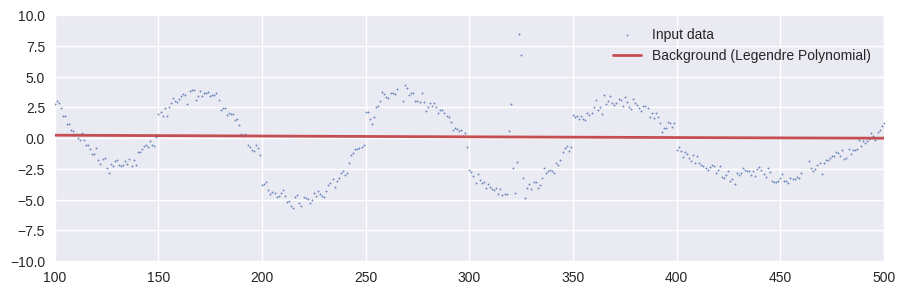

In [99]:
X = fit.stan_variables()['X']            # (draws, L)
A = np.asarray(data_dict['A_unsup'])     # (N, L)
y = np.asarray(data_dict['y_unsup'])     # (N,)

mu_draws = X @ A.T                        # (draws, N)
mu_mean  = mu_draws.mean(axis=0)

plt.figure(figsize=(9, 3))
plt.scatter(np.arange(len(y)), y, s=1, label='Input data', alpha=0.75)
plt.plot(mu_mean, lw=2, label='Background (Legendre Polynomial)', color=sns.color_palette()[2])
plt.legend()
plt.tight_layout()
plt.ylim(-10,10)
plt.xlim(100,500)
plt.show()